In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [60]:
data = pd.read_csv('hotel_bookings.csv')

In [61]:
data['children'].fillna(round(data.children.mean()), inplace=True)

In [62]:
data = data.drop(data[(data.adults+data.babies+data.children)==0].index)

In [63]:
data[['agent','company']] = data[['agent','company']].fillna(0.0)

In [64]:
data[['children', 'company', 'agent', 'adr']] = data[['children', 'company', 'agent', 'adr']].astype('int64')

In [65]:
data['hotel'] = data['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

data['arrival_date_month'] = data['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [66]:
def family(data):
    if ((data['adults'] > 0) & (data['children'] > 0)):
        val = 1
    elif ((data['adults'] > 0) & (data['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

In [67]:
data["is_family"] = data.apply(family, axis = 1)
data["total_customer"] = data["adults"] + data["children"] + data["babies"]

In [68]:
data['Room'] = 0
data.loc[ data['reserved_room_type'] == data['assigned_room_type'] , 'Room'] = 1

In [69]:
data['net_cancelled'] = 0
data.loc[ data['previous_cancellations'] > data['previous_bookings_not_canceled'] , 'net_cancelled'] = 1

In [70]:
data.dropna(subset=['country'],inplace=True)

In [71]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,Room,net_cancelled
0,0,0,342,2015,7,27,1,0,0,2,...,Transient,0,0,0,Check-Out,2015-07-01,0,2,1,0
1,0,0,737,2015,7,27,1,0,0,2,...,Transient,0,0,0,Check-Out,2015-07-01,0,2,1,0
2,0,0,7,2015,7,27,1,0,1,1,...,Transient,75,0,0,Check-Out,2015-07-02,0,1,0,0
3,0,0,13,2015,7,27,1,0,1,1,...,Transient,75,0,0,Check-Out,2015-07-02,0,1,1,0
4,0,0,14,2015,7,27,1,0,2,2,...,Transient,98,0,1,Check-Out,2015-07-03,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,23,2017,8,35,30,2,5,2,...,Transient,96,0,0,Check-Out,2017-09-06,0,2,1,0
119386,1,0,102,2017,8,35,31,2,5,3,...,Transient,225,0,2,Check-Out,2017-09-07,0,3,1,0
119387,1,0,34,2017,8,35,31,2,5,2,...,Transient,157,0,4,Check-Out,2017-09-07,0,2,1,0
119388,1,0,109,2017,8,35,31,2,5,2,...,Transient,104,0,0,Check-Out,2017-09-07,0,2,1,0


In [72]:
data = data.drop(['adults', 'children', 'babies', 'arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                            'arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date',
                            'previous_cancellations','previous_bookings_not_canceled', 'reservation_status'],axis=1)

In [73]:
data

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,Room,net_cancelled
0,0,0,342,0,0,BB,PRT,Direct,Direct,0,...,0,0,Transient,0,0,0,0,2,1,0
1,0,0,737,0,0,BB,PRT,Direct,Direct,0,...,0,0,Transient,0,0,0,0,2,1,0
2,0,0,7,0,1,BB,GBR,Direct,Direct,0,...,0,0,Transient,75,0,0,0,1,0,0
3,0,0,13,0,1,BB,GBR,Corporate,Corporate,0,...,0,0,Transient,75,0,0,0,1,1,0
4,0,0,14,0,2,BB,GBR,Online TA,TA/TO,0,...,0,0,Transient,98,0,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,23,2,5,BB,BEL,Offline TA/TO,TA/TO,0,...,0,0,Transient,96,0,0,0,2,1,0
119386,1,0,102,2,5,BB,FRA,Online TA,TA/TO,0,...,0,0,Transient,225,0,2,0,3,1,0
119387,1,0,34,2,5,BB,DEU,Online TA,TA/TO,0,...,0,0,Transient,157,0,4,0,2,1,0
119388,1,0,109,2,5,BB,GBR,Online TA,TA/TO,0,...,0,0,Transient,104,0,0,0,2,1,0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118732 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   hotel                        118732 non-null  int64 
 1   is_canceled                  118732 non-null  int64 
 2   lead_time                    118732 non-null  int64 
 3   stays_in_weekend_nights      118732 non-null  int64 
 4   stays_in_week_nights         118732 non-null  int64 
 5   meal                         118732 non-null  object
 6   country                      118732 non-null  object
 7   market_segment               118732 non-null  object
 8   distribution_channel         118732 non-null  object
 9   is_repeated_guest            118732 non-null  int64 
 10  booking_changes              118732 non-null  int64 
 11  deposit_type                 118732 non-null  object
 12  agent                        118732 non-null  int64 
 13  company       

In [75]:
#columns to encode

# to_encode = ["deposit_type", "customer_type", "hotel" , "meal", 'country','market_segment',"distribution_channel",'assigned_room_type', 'reserved_room_type', "arrival_date_month"]
to_encode = ["meal", "country", "market_segment", "distribution_channel", "deposit_type", "customer_type"]

for column in data.columns:
    if column in to_encode:
        le = preprocessing.LabelEncoder()
        le.fit(data[column].astype(str))
        data[column]=le.transform(data[column])
        keys = le.classes_
        values = le.transform(le.classes_)
        dictionary = dict(zip(keys, values))
        print(dictionary)

{'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}
{'ABW': 0, 'AGO': 1, 'AIA': 2, 'ALB': 3, 'AND': 4, 'ARE': 5, 'ARG': 6, 'ARM': 7, 'ASM': 8, 'ATA': 9, 'ATF': 10, 'AUS': 11, 'AUT': 12, 'AZE': 13, 'BDI': 14, 'BEL': 15, 'BEN': 16, 'BFA': 17, 'BGD': 18, 'BGR': 19, 'BHR': 20, 'BHS': 21, 'BIH': 22, 'BLR': 23, 'BOL': 24, 'BRA': 25, 'BRB': 26, 'BWA': 27, 'CAF': 28, 'CHE': 29, 'CHL': 30, 'CHN': 31, 'CIV': 32, 'CMR': 33, 'CN': 34, 'COL': 35, 'COM': 36, 'CPV': 37, 'CRI': 38, 'CUB': 39, 'CYM': 40, 'CYP': 41, 'CZE': 42, 'DEU': 43, 'DJI': 44, 'DMA': 45, 'DNK': 46, 'DOM': 47, 'DZA': 48, 'ECU': 49, 'EGY': 50, 'ESP': 51, 'EST': 52, 'ETH': 53, 'FIN': 54, 'FJI': 55, 'FRA': 56, 'FRO': 57, 'GAB': 58, 'GBR': 59, 'GEO': 60, 'GGY': 61, 'GHA': 62, 'GIB': 63, 'GLP': 64, 'GNB': 65, 'GRC': 66, 'GTM': 67, 'GUY': 68, 'HKG': 69, 'HND': 70, 'HRV': 71, 'HUN': 72, 'IDN': 73, 'IMN': 74, 'IND': 75, 'IRL': 76, 'IRN': 77, 'IRQ': 78, 'ISL': 79, 'ISR': 80, 'ITA': 81, 'JAM': 82, 'JEY': 83, 'JOR': 84, 'JPN': 85, 'KAZ': 86, 

In [76]:
data.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,Room,net_cancelled
0,0,0,342,0,0,0,135,3,1,0,...,0,0,2,0,0,0,0,2,1,0
1,0,0,737,0,0,0,135,3,1,0,...,0,0,2,0,0,0,0,2,1,0
2,0,0,7,0,1,0,59,3,1,0,...,0,0,2,75,0,0,0,1,0,0
3,0,0,13,0,1,0,59,2,0,0,...,0,0,2,75,0,0,0,1,1,0
4,0,0,14,0,2,0,59,6,3,0,...,0,0,2,98,0,1,0,2,1,0


In [77]:
# features
X = data.drop(["is_canceled"], axis=1)

# target
y = data['is_canceled']

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118732 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   hotel                        118732 non-null  int64
 1   lead_time                    118732 non-null  int64
 2   stays_in_weekend_nights      118732 non-null  int64
 3   stays_in_week_nights         118732 non-null  int64
 4   meal                         118732 non-null  int32
 5   country                      118732 non-null  int32
 6   market_segment               118732 non-null  int32
 7   distribution_channel         118732 non-null  int32
 8   is_repeated_guest            118732 non-null  int64
 9   booking_changes              118732 non-null  int64
 10  deposit_type                 118732 non-null  int32
 11  agent                        118732 non-null  int64
 12  company                      118732 non-null  int64
 13  days_in_waiting_list         

### Train Test Split without Scaling and PCA

In [48]:
from sklearn.model_selection import train_test_split
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, precision_score, f1_score, recall_score, classification_report

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc, matthews_corrcoef
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.preprocessing import RobustScaler, StandardScaler

from numpy import argmax
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
import itertools

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN

In [78]:
def results(balancing_technique):
    print(balancing_technique)
    fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
    model_name = ["RF", "XGB", "LGBM", "LR", "MLP"]
    RFC = RandomForestClassifier(random_state = 0)
    XGBC = XGBClassifier(random_state = 0)
    LGBC = LGBMClassifier(random_state = 0)
    LRC = LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 1000)
    MLPC = MLPClassifier(activation = 'relu', alpha = 0.1, hidden_layer_sizes = (100,100), solver = 'adam')
#     DTC = DecisionTreeClassifier(random_state = 0)
#     models = []
#     models.append(('1', RFC))
#     models.append(('2', XGBC))
#     ENS = VotingClassifier(models, voting = 'soft')

    for clf,i in zip([RFC, XGBC, LGBC, LRC, MLPC], model_name):
        model = clf.fit(X_train, y_train.values.ravel())
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        print("#"*25,i,"#"*25)
        print("Training Accuracy = {:.3f}".format(model.score(X_train, y_train)))
        print("Test Accuracy = {:.3f}".format(model.score(X_test, y_test)))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        #Confusion Matrix
        print(pd.DataFrame(confusion_matrix(y_test, y_pred)))
        print("-"*15,"CLASSIFICATION REPORT","-"*15)
        print()
#         print("precision =", precision_score(y_test, y_pred))
#         print("recall =", recall_score(y_test, y_pred))
#         print("MCC =", matthews_corrcoef(y_test, y_pred))
        print("standard f1 score =", f1_score(y_test, y_pred))
        print()
        
         #precision-recall curve
        precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
        avg_pre = average_precision_score(y_test, y_pred_prob)
        ax1.plot(recall, precision, label = i+ " average precision = {:0.3f}".format(avg_pre), lw = 3, alpha = 0.7)
        ax1.set_xlabel('Recall', fontsize = 14)
        ax1.set_ylabel('Precision', fontsize = 14)
        ax1.set_title('Precision-Recall Curve', fontsize = 18)
        ax1.legend(loc = 'best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_pr - 0.5))
        ax1.plot(recall[close_default], precision[close_default], 'o', markersize = 8)

        #roc-curve
        fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr,tpr)
        ax2.plot(fpr,tpr, label = i+ " area = {:0.3f}".format(roc_auc), lw = 3, alpha = 0.7)
        ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
        ax2.set_xlabel("False Positive Rate", fontsize = 14)
        ax2.set_ylabel("True Positive Rate", fontsize = 14)
        ax2.set_title("ROC Curve", fontsize = 18)
        ax2.legend(loc = 'best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_roc - 0.5))
        ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
        plt.tight_layout()

update
######################### RF #########################
Training Accuracy = 0.995
Test Accuracy = 0.888
ROC_AUC_score : 0.873076
       0     1
0  13908  1057
1   1609  7173
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8432870914648484

######################### XGB #########################
Training Accuracy = 0.889
Test Accuracy = 0.878
ROC_AUC_score : 0.862412
       0     1
0  13795  1170
1   1730  7052
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8294518936720772

######################### LGBM #########################
Training Accuracy = 0.875
Test Accuracy = 0.872
ROC_AUC_score : 0.854633
       0     1
0  13782  1183
1   1859  6923
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8198720985315017



C:\Users\Maurice\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


######################### LR #########################
Training Accuracy = 0.796
Test Accuracy = 0.796
ROC_AUC_score : 0.751340
       0     1
0  13785  1180
1   3675  5107
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.6778153825734953

######################### MLP #########################
Training Accuracy = 0.848
Test Accuracy = 0.845
ROC_AUC_score : 0.822945
       0     1
0  13597  1368
1   2307  6475
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.7789473684210526



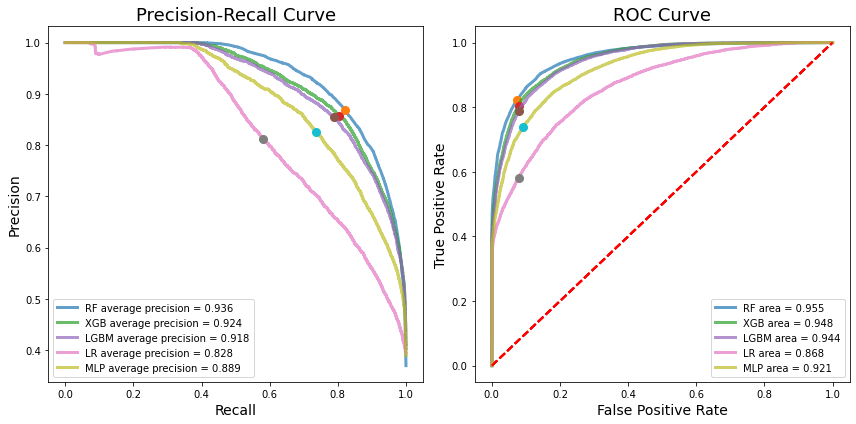

In [80]:
from sklearn.neural_network import MLPClassifier
results("update")

Preliminary
######################### RF #########################
Training Accuracy = 0.996
Test Accuracy = 0.887
ROC_AUC_score : 0.871353
       0     1
0  13900  1004
1   1686  7191
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8424320524835989

######################### XGB #########################
Training Accuracy = 0.883
Test Accuracy = 0.869
ROC_AUC_score : 0.853009
       0     1
0  13647  1257
1   1861  7016
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8181924198250728

######################### LGBM #########################
Training Accuracy = 0.867
Test Accuracy = 0.864
ROC_AUC_score : 0.845621
       0     1
0  13682  1222
1   2013  6864
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8092908094087131



C:\Users\Maurice\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


######################### LR #########################
Training Accuracy = 0.794
Test Accuracy = 0.795
ROC_AUC_score : 0.752354
       0     1
0  13699  1205
1   3679  5198
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.6803664921465968



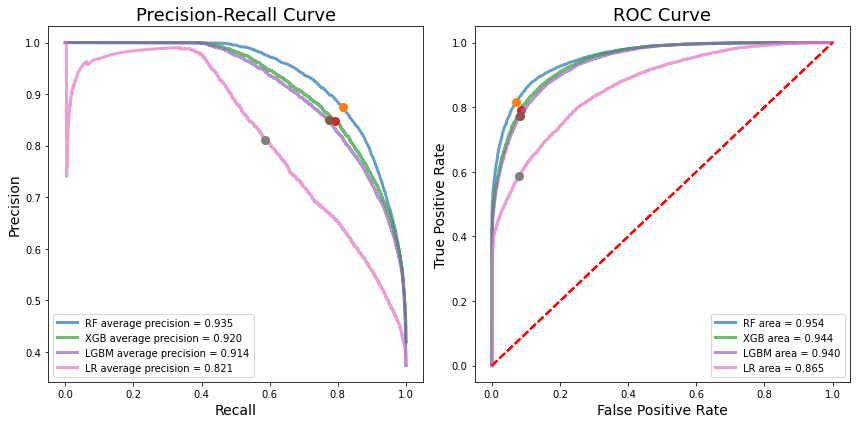

In [143]:
results("Preliminary")

### Additional data splits with Scaling and PCA below, might want to repeat model with scaled and pca data if it makes sense for the model to see if accuracy improves

### Scaling

In [81]:
# create copy of DF for scaling
X_scaled = X.copy()

In [82]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                    'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                    'total_of_special_requests', 'total_customer']

remaining_columns = [x for x in X_scaled.columns if x not in columns_to_scale]


# Scale columns
scaler = StandardScaler()

X_scaled[columns_to_scale] = scaler.fit_transform(X_scaled[columns_to_scale]) # to learn mean and standard dev to be used for scaling


In [83]:
# Train Test Split with Scaling
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=420)

In [57]:
X_train.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,booking_changes,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,Room,net_cancelled
74420,1,1.801457,0.072225,-0.794520,0,135,4,3,0,-0.342495,...,0,-0.132173,0,-0.792517,-0.253506,-0.721299,0,0.037052,1,1
73656,1,0.987723,-0.935112,0.793557,0,59,6,3,0,-0.342495,...,0,-0.132173,2,0.299213,-0.253506,-0.721299,0,0.037052,1,0
53308,1,1.735984,0.072225,-0.265161,0,135,5,3,0,-0.342495,...,0,5.992812,3,-0.594021,-0.253506,-0.721299,0,0.037052,1,0
79703,1,-0.751982,1.079563,1.322915,0,43,6,3,0,-0.342495,...,0,-0.132173,0,0.557259,-0.253506,1.801607,0,0.037052,1,0
119126,1,0.239463,1.079563,1.322915,2,56,3,1,0,-0.342495,...,0,-0.132173,2,3.931698,-0.253506,0.540154,1,2.820484,1,0


update
######################### RF #########################
Training Accuracy = 0.995
Test Accuracy = 0.888
ROC_AUC_score : 0.873076
       0     1
0  13908  1057
1   1609  7173
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8432870914648484

######################### XGB #########################
Training Accuracy = 0.889
Test Accuracy = 0.878
ROC_AUC_score : 0.862412
       0     1
0  13795  1170
1   1730  7052
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8294518936720772

######################### LGBM #########################
Training Accuracy = 0.875
Test Accuracy = 0.872
ROC_AUC_score : 0.854633
       0     1
0  13782  1183
1   1859  6923
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8198720985315017



C:\Users\Maurice\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


######################### LR #########################
Training Accuracy = 0.796
Test Accuracy = 0.796
ROC_AUC_score : 0.751340
       0     1
0  13785  1180
1   3675  5107
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.6778153825734953

######################### MLP #########################
Training Accuracy = 0.837
Test Accuracy = 0.834
ROC_AUC_score : 0.819439
       0     1
0  13124  1841
1   2091  6691
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.7729005429132494



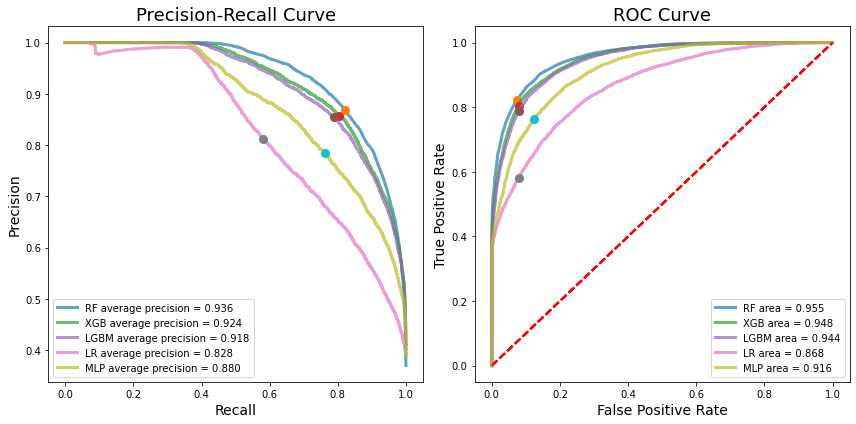

In [84]:
results("update")

After scaling
######################### RF #########################
Training Accuracy = 0.996
Test Accuracy = 0.887
ROC_AUC_score : 0.871387
       0     1
0  13901  1003
1   1686  7191
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8424814012067249

######################### XGB #########################
Training Accuracy = 0.883
Test Accuracy = 0.869
ROC_AUC_score : 0.853009
       0     1
0  13647  1257
1   1861  7016
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8181924198250728

######################### LGBM #########################
Training Accuracy = 0.868
Test Accuracy = 0.864
ROC_AUC_score : 0.845917
       0     1
0  13669  1235
1   2000  6877
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8095826711401495



C:\Users\Maurice\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


######################### LR #########################
Training Accuracy = 0.793
Test Accuracy = 0.794
ROC_AUC_score : 0.752197
       0     1
0  13696  1208
1   3680  5197
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.6801465776730795



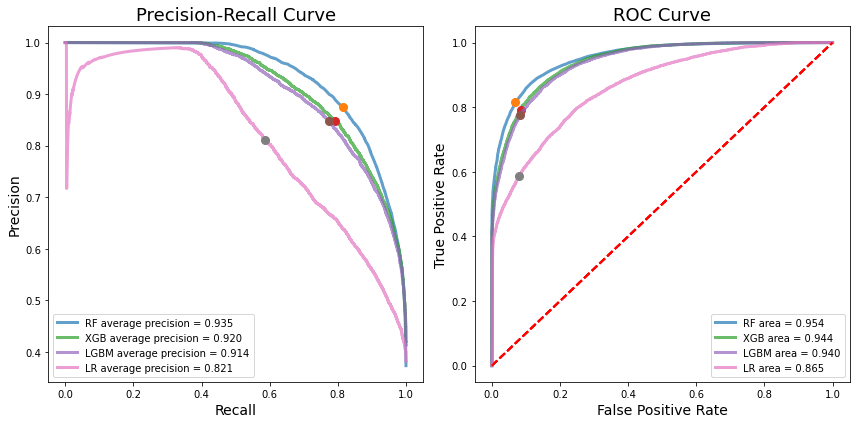

In [151]:
results("After scaling")

### PCA

In [155]:
X_pca = X.copy()

In [156]:
X_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  int64  
 1   lead_time                       118902 non-null  int64  
 2   arrival_date_month              118902 non-null  int64  
 3   stays_in_weekend_nights         118902 non-null  int64  
 4   stays_in_week_nights            118902 non-null  int64  
 5   meal                            118902 non-null  int32  
 6   country                         118902 non-null  int32  
 7   market_segment                  118902 non-null  int32  
 8   distribution_channel            118902 non-null  int32  
 9   is_repeated_guest               118902 non-null  int64  
 10  previous_cancellations          118902 non-null  int64  
 11  previous_bookings_not_canceled  118902 non-null  int64  
 12  reserved_room_ty

In [157]:
from sklearn.decomposition import PCA

# X_pca.drop('date', axis=1, inplace=True)

for i in range(1,24):
    pca = PCA(n_components=i, random_state=420)
    components = pca.fit_transform(X_pca)
    print(i)
    print('explained var ratio', pca.explained_variance_ratio_)
    print('sum', sum(pca.explained_variance_ratio_))
    print()

1
explained var ratio [0.70249595]
sum 0.7024959499593005

2
explained var ratio [0.70249595 0.161313  ]
sum 0.8638089462671904

3
explained var ratio [0.70249595 0.161313   0.11606748]
sum 0.9798764235274284

4
explained var ratio [0.70249595 0.161313   0.11606748 0.01841733]
sum 0.9982937537003282

5
explained var ratio [7.02495950e-01 1.61312996e-01 1.16067477e-01 1.84173302e-02
 5.69590505e-04]
sum 0.9988633442057057

6
explained var ratio [7.02495950e-01 1.61312996e-01 1.16067477e-01 1.84173302e-02
 5.69590505e-04 3.32811066e-04]
sum 0.9991961552717594

7
explained var ratio [7.02495950e-01 1.61312996e-01 1.16067477e-01 1.84173302e-02
 5.69590505e-04 3.32811066e-04 2.16672319e-04]
sum 0.9994128275907368

8
explained var ratio [7.02495950e-01 1.61312996e-01 1.16067477e-01 1.84173302e-02
 5.69590505e-04 3.32811066e-04 2.16672319e-04 1.51176916e-04]
sum 0.9995640045066272

9
explained var ratio [7.02495950e-01 1.61312996e-01 1.16067477e-01 1.84173302e-02
 5.69590505e-04 3.32811066e-0

In [158]:
# 11 randomly chosen, might want to change number of principle components
n = 11 
pca = PCA(n_components=n, random_state=69)
pca_components = pca.fit_transform(X_pca)
print('explained var ratio', pca.explained_variance_ratio_)
print('sum', sum(pca.explained_variance_ratio_))

columns = []
for i in range(n):
    x = "pc" + str(i)
    columns.append(x)

# convert numpy array to dataframe
X_pca = pd.DataFrame(pca_components, columns=columns)
X_pca

explained var ratio [7.02495950e-01 1.61312996e-01 1.16067477e-01 1.84173302e-02
 5.69590505e-04 3.32811066e-04 2.16672319e-04 1.51176916e-04
 1.09392768e-04 6.58994283e-05 4.24491947e-05]
sum 0.9997817458979775


,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,242.599068,-98.425816,-0.648545,-10.881859,0.044372,-2.403501,-4.214123,0.351632,-1.446272,-0.489455,-0.407126
1,636.929612,-79.033921,-5.528251,-21.923400,1.599311,-2.939143,-5.921855,0.762790,-1.526810,-0.773177,-0.838047
2,-97.081929,-17.685379,-40.257454,0.916819,-1.103252,0.529729,-1.883400,1.207603,-2.151133,0.060299,-0.312572
3,-91.087160,-17.417442,-40.329302,0.756491,-1.122111,1.870046,-1.529455,2.054542,-3.109554,0.127319,-0.041018
4,-91.025312,4.100099,-32.058909,0.935883,-0.938662,1.914441,0.265866,-0.629520,0.578997,0.942862,-0.404241
...,...,...,...,...,...,...,...,...,...,...,...
118897,-83.208626,18.666139,-73.863111,1.654654,-1.978548,0.867937,2.886501,0.707560,-0.573639,0.939210,0.345682
118898,-8.498834,128.289818,10.112402,-0.299099,-0.776457,-2.727738,1.255554,0.212597,0.357816,0.719897,0.062841
118899,-73.971902,66.546305,-25.646488,1.261183,-1.472781,-2.306200,1.902166,-0.077095,0.790973,0.877792,-0.245028
118900,3.565802,14.742810,-30.931457,-1.669957,-1.495632,0.704834,2.946874,0.110353,0.198059,0.964803,0.195426


In [159]:
# Train Test Split with Scaling and PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=420)

After PCA
######################### RF #########################
Training Accuracy = 0.996
Test Accuracy = 0.860
ROC_AUC_score : 0.836414
       0     1
0  13834  1070
1   2267  6610
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.7984538261762396

######################### XGB #########################
Training Accuracy = 0.871
Test Accuracy = 0.834
ROC_AUC_score : 0.810711
       0     1
0  13454  1450
1   2497  6380
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.7637517208355779

######################### LGBM #########################
Training Accuracy = 0.834
Test Accuracy = 0.823
ROC_AUC_score : 0.794465
       0     1
0  13507  1397
1   2817  6060
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.7420105301824416

######################### LR #########################
Training Accuracy = 0.729
Test Accuracy = 0.732
ROC_AUC_score : 0.689229
       0     1
0  12813  2091
1   4272  4605
----------

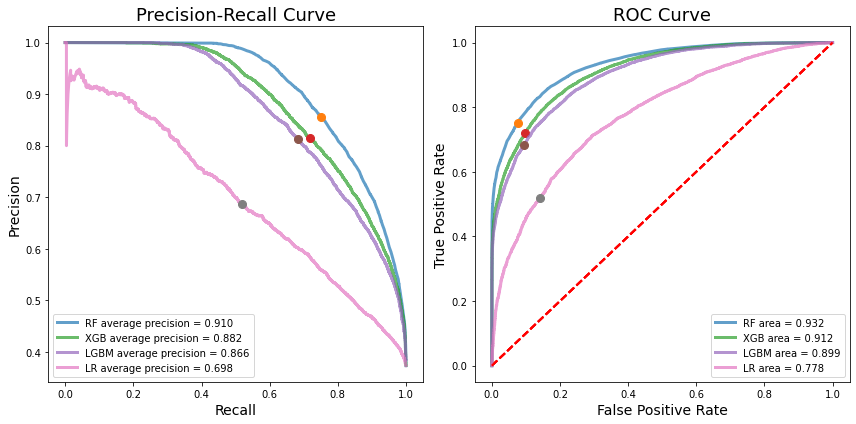

In [160]:
results("After PCA")